# 표준정규화 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy

%matplotlib inline

## 아래와 같은 데이터 $X$를 측정했다고 합시다.

In [2]:
np.random.seed(0)
X = np.random.normal(10., 5, (10000,1))
X

array([[18.82026173],
       [12.00078604],
       [14.89368992],
       ...,
       [12.58436089],
       [ 9.83539653],
       [16.49055716]])

## 데이터가 정규분포를 따릅니다. 아래 그림에서 붉은 점선은 0입니다. 평균이 10, 표준편차가 5입니다.

In [3]:
def plot_dist(X):
    """
    args:
        데이터
    return:
        None
        데이터 분포를 그려줌
    """
    plt.hist(X, bins=100, label='sample')
    plt.axvline(0, linestyle=':', color='red', label='0', alpha=.5)
    plt.legend()
    plt.show()

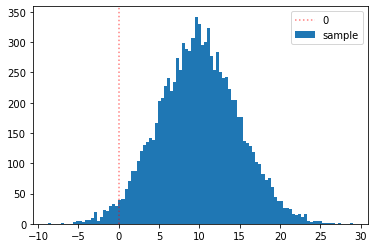

In [4]:
plot_dist(X)

## 이 데이터를 평균이 0, 표준편차가 1로 변환해봅시다.
현재 데이터의 평균이 $\mu$, 표준편차가 $\sigma$라면, 데이터의 값에서 평균을 빼주고, 거기에 표준편차로 나누어주면 표준정규화가 됩니다.
$$
z = {X - \mu \over \sigma}
$$

In [5]:
# 평균 구하기
mu = 0.

for x in X:
    mu += x
    
mu /= len(X)
print(mu)

[9.9078314]


In [6]:
# 표준편차 구하기
sigma = 0.

for x in X:
    sigma += (mu - x) ** 2
    
sigma /= len(X) - 1
sigma = np.sqrt(sigma)
print(sigma)

[4.93802975]


* 평균이 mean=9.907831399208671
* variance=24.384137797474672 의 제곱근이 표준편차입니다.

## 데이터 $X$가 10000개 샘플로 이루어져있는데요. 얘네 값 하나하나에 위 표준정규화 식을 대입하면 됩니다.

In [7]:
X_normalized = (X - mu) / sigma
X_normalized

array([[ 1.80485554],
       [ 0.42384407],
       [ 1.0096858 ],
       ...,
       [ 0.54202377],
       [-0.01466878],
       [ 1.33306725]])

## 표준 정규화한 데이터를 화면에 그려봅시다.

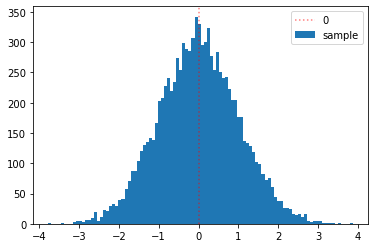

In [8]:
plot_dist(X_normalized)

## 사이킷런으로 더 쉽게 표준정규화하기
위에서 하나하나 어렵게 만들었던 것 사이킷런의 StandardScaler()로 단 세줄만 만들면 됩니다.

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_normalized2 = scaler.transform(X)

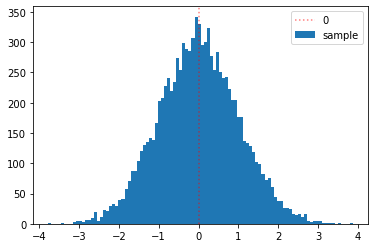

In [10]:
plot_dist(X_normalized2)

## 정규화한 데이터의 평균과 표준편차를 scipy로 쉽게 알아봅시다.

In [11]:
stats = scipy.stats.describe(X_normalized2)

print(f"변환 데이터 평균: {abs(stats.mean[0]):.2f}, 표준편차: {np.sqrt(stats.variance[0]):.2f}")

변환 데이터 평균: 0.00, 표준편차: 1.00
